# Matplotlib

## 简介

### 特点

* 具有良好的操作系统兼容性和图层接口显示底层兼容性
* 强大的绘图能力以及灵活控制图形, 同时又不失简洁性.

### 帮助

* [Gallery](https://matplotlib.org/gallery/index.html)

* Google, StackOverflow

### backends

`Matplotlib`有很多`backends`, `backends`负责显示图形, 跟环境与硬件有关, 以适用各种环境如交互式绘图等, 以及图形的保存.

In [1]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.get_backend())

3.1.0
module://ipykernel.pylab.backend_inline


In [2]:
matplotlib.use('nbAgg')
print(matplotlib.get_backend())

nbAgg


上面的代码必须在`import matplotlib.pyplot as plt`之前导入. 也可以使用`IPython`的magic命令`%matplotlib backend_name`选择`backends`. 

In [3]:
%matplotlib notebook

## 基本绘图

In [4]:
import numpy as np
import matplotlib.pyplot as plt

<img src="attachment:image.png" width="500">

![image.png](attachment:image.png)

### Figures

<IPython.core.display.Javascript object>


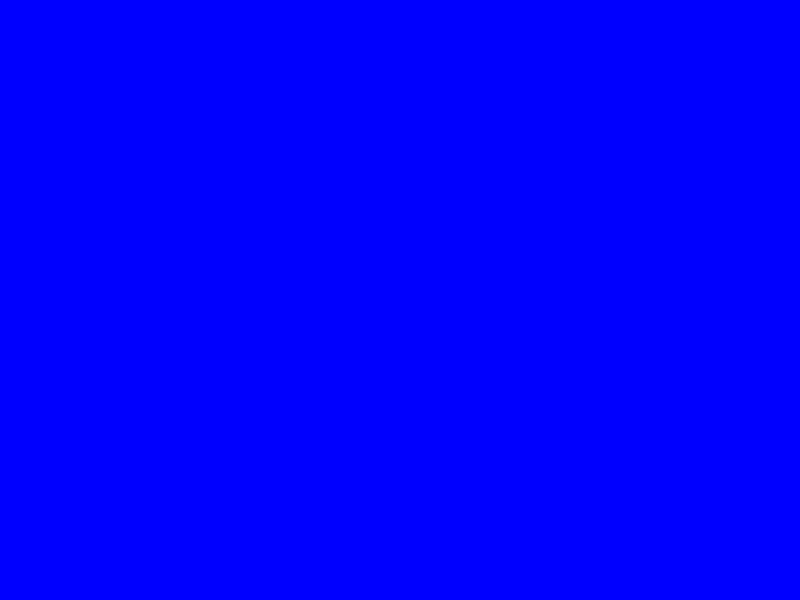

In [5]:
fig = plt.figure(facecolor="b")

注意: 如果在非交互式环境绘图环境中, 需要使用`plt.show()`才能看见上图.

<IPython.core.display.Javascript object>


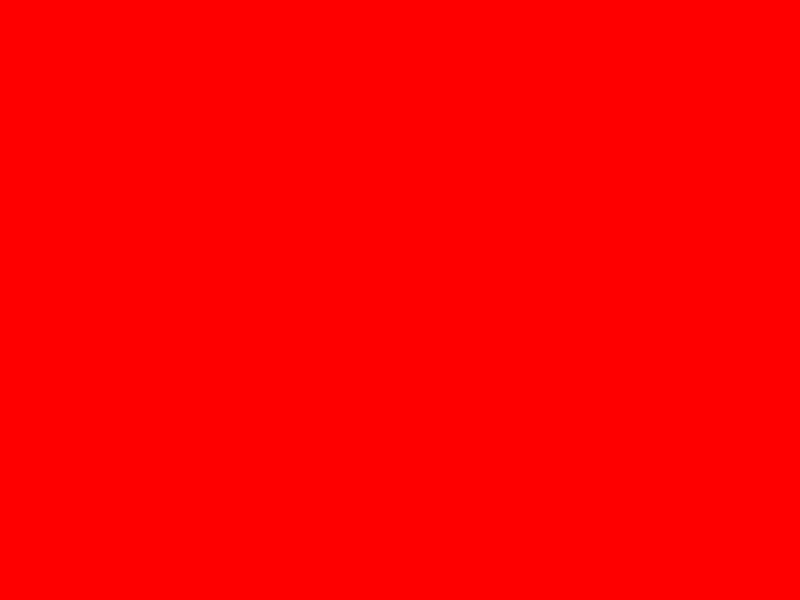

In [6]:
fig = plt.figure(figsize=(4,3), 
                 facecolor="r")

<IPython.core.display.Javascript object>


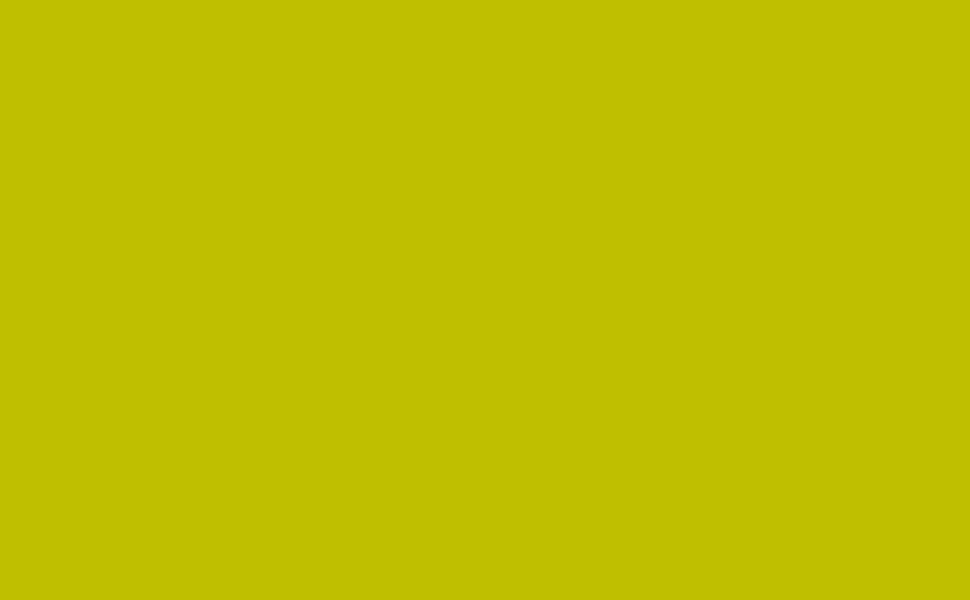

In [8]:
fig = plt.figure(figsize=plt.figaspect(0.618), 
                 facecolor="y")
# plt.show()

### Axes

<IPython.core.display.Javascript object>


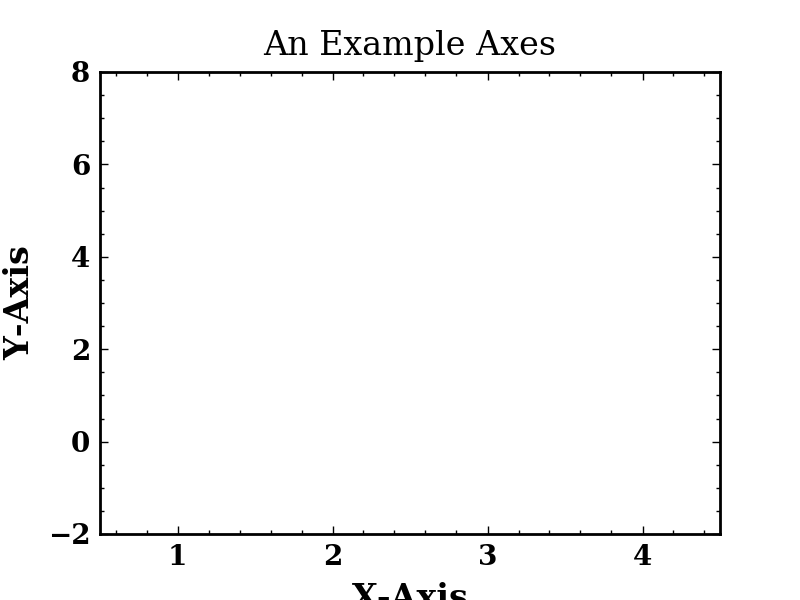

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], 
       title='An Example Axes',
       ylabel='Y-Axis', xlabel='X-Axis')
plt.show()

`Matplotlib`的很多性质可通过`ax.set_something`实现.

In [10]:
# ax.set_

作为对比,

```python
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], 
       title='An Example Axes',
       ylabel='Y-Axis', xlabel='X-Axis')
```
上面代码也可以写成:

<IPython.core.display.Javascript object>


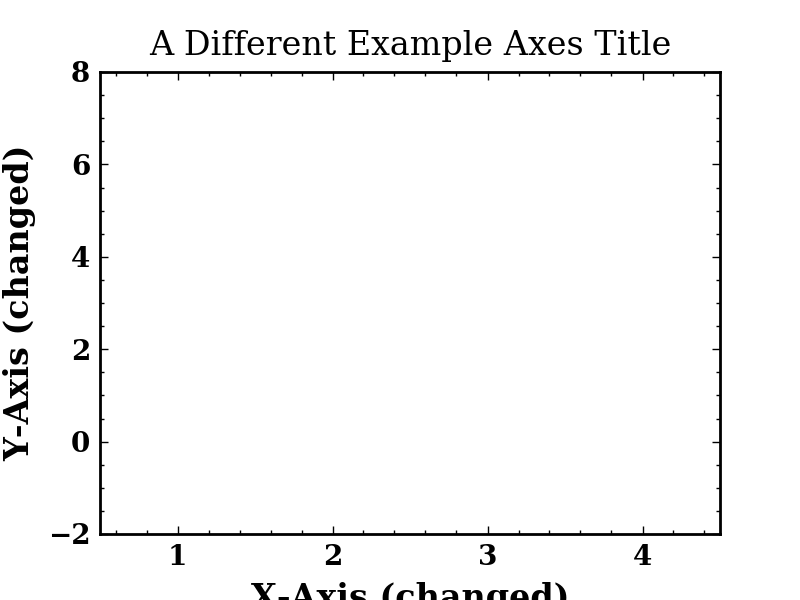

Text(0.5, 0, 'X-Axis (changed)')

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2, 8])
ax.set_title('A Different Example Axes Title')
ax.set_ylabel('Y-Axis (changed)')
ax.set_xlabel('X-Axis (changed)')

### 绘图初探

大部分绘图操作作用在`Axes`中, 我们首先介绍两种简单的绘图方法: `plot`与`scatter`.

<IPython.core.display.Javascript object>


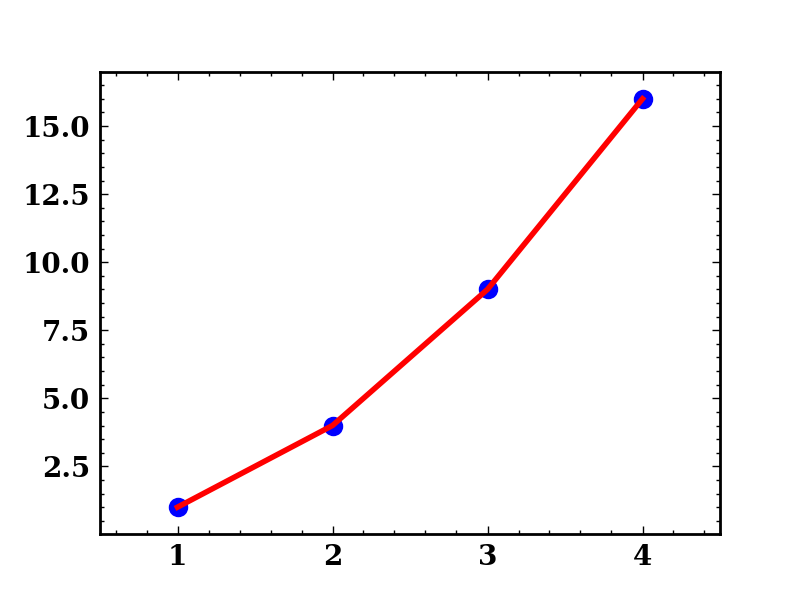

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [1, 4, 9, 16], 
        color='r', linewidth=2)
ax.scatter([1, 2, 3, 4], [1, 4, 9, 16], 
#         s = [100, 200, 300, 400],
        color="b", marker='o')
ax.set_xlim(0.5, 4.5)
plt.show()

#### 面向对象绘图 vs. `Matlab`风格绘图

绘图指令:

```python
ax.plot([1, 2, 3, 4], [1, 4, 9, 16], 
        color='r', linewidth=2)
ax.scatter([1, 2, 3, 4], [1, 4, 9, 16], 
#         s = [100, 200, 300, 400],
        color="b", marker='o')
ax.set_xlim(0.5, 4.5)
```

<IPython.core.display.Javascript object>


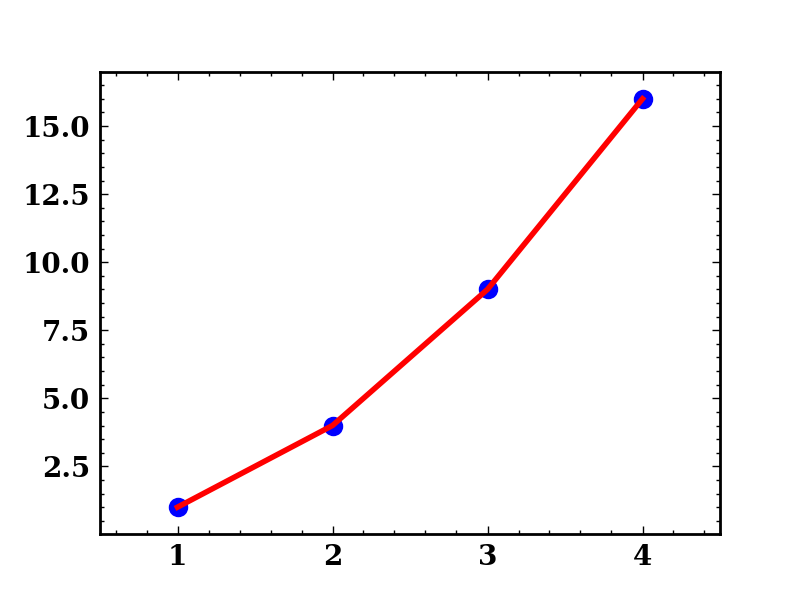

(0.5, 4.5)

In [13]:
plt.figure()
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 
        color='r', linewidth=2)
plt.scatter([1, 2, 3, 4], [1, 4, 9, 16], 
#         s = [100, 200, 300, 400],
        color="b", marker='o')
plt.xlim(0.5, 4.5)

这种绘图方式又快又方便, 适用于快速验证想法(演示 pylab), 但是灵活性不够.

#### 多个Axes

<IPython.core.display.Javascript object>


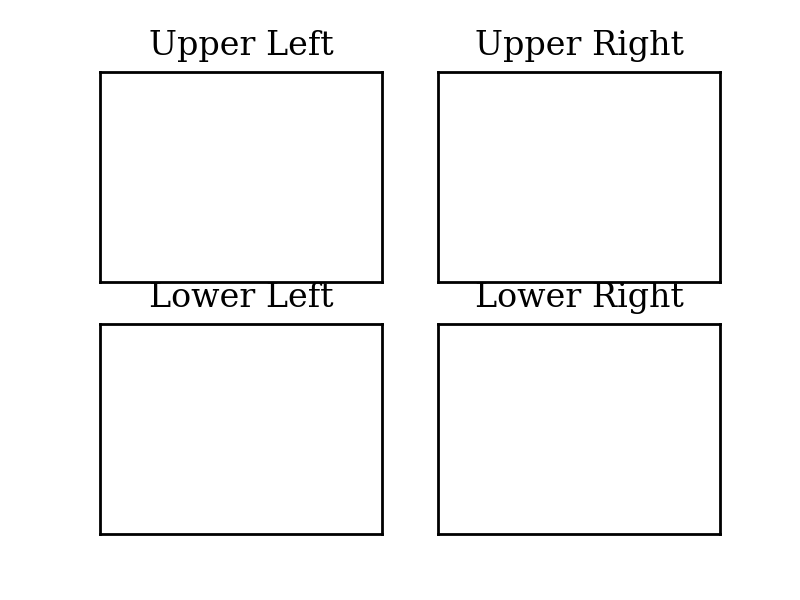

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])

In [14]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c3cec18>,
      dtype=object)

使用`plt.subplots()`不带参数的时候, 默认创建只有一个`subplot`的`figure`.

```python
fig = plt.figure()
ax = fig.add_subplot(111)
```

可以替换为:

```python
fig, ax = plt.subplots()
```

In [15]:
x = np.linspace(0, 10, 100)
y1, y2 = np.cos(x), np.sin(x)
names = ['Signal 1', 'Signal 2']


<img src="attachment:image.png" width="400">

<IPython.core.display.Javascript object>


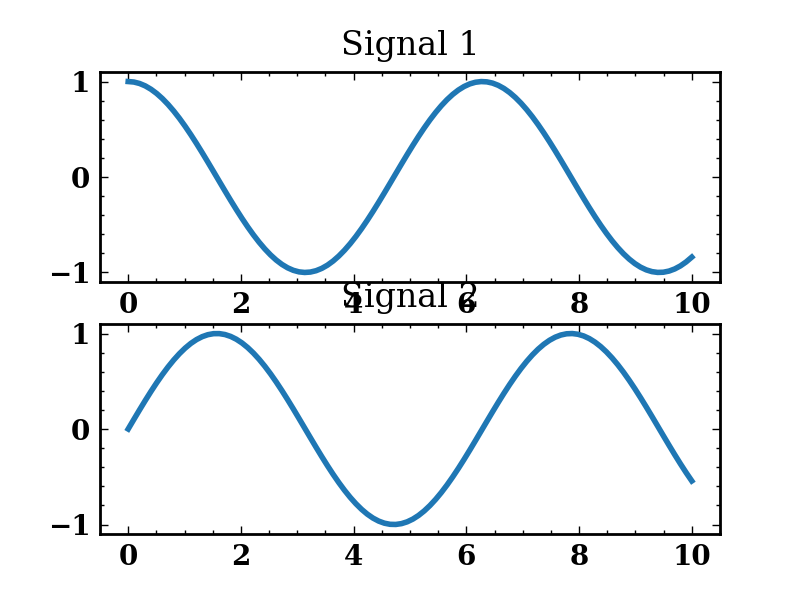

In [16]:
fig, axes = plt.subplots(2, 1)

x = np.linspace(0, 10, 100)
y1, y2 = np.cos(x), np.sin(x)
names = ['Signal 1', 'Signal 2']

axes[0].plot(x, y1)
axes[1].plot(x, y2)
for i, ax in enumerate(axes):
    ax.set_title(names[i])

plt.savefig("ex1.png", dpi=600)

## 绘图函数概览

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

<IPython.core.display.Javascript object>


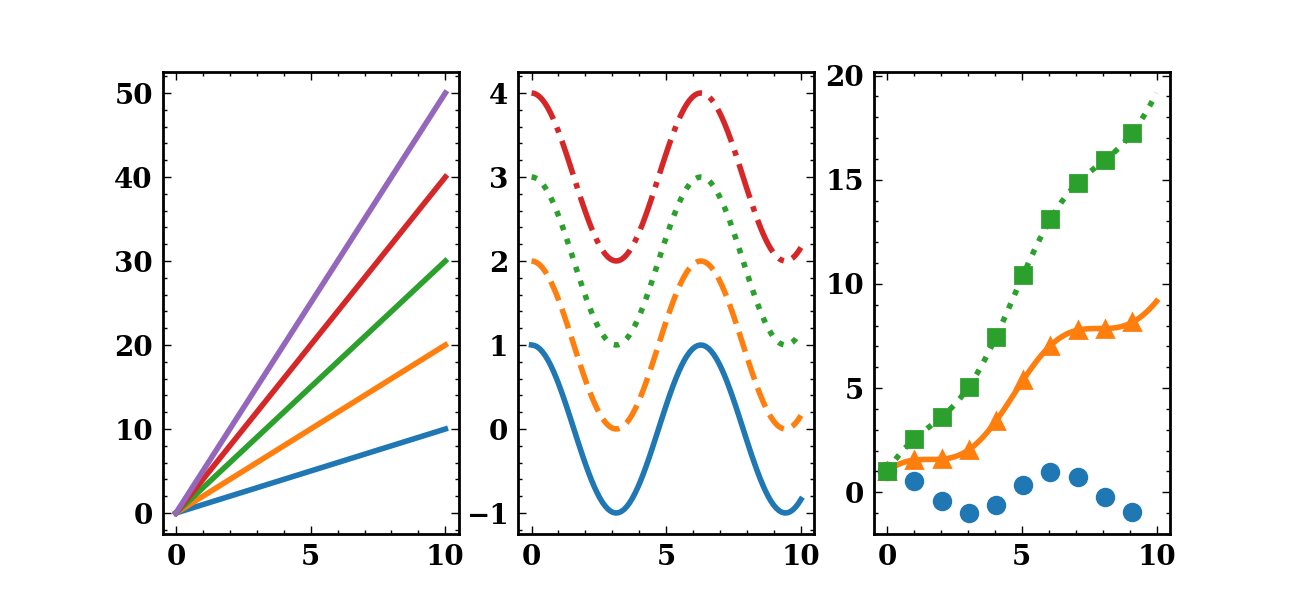

In [17]:
x = np.linspace(0, 10, 100)

fig, axes = plt.subplots(ncols=3, figsize=(6.5,3))

for i in range(1, 6):
    axes[0].plot(x, i * x)

for i, ls in enumerate(['-', '--', ':', '-.']):
    axes[1].plot(x, np.cos(x) + i, linestyle=ls)
    
for i, (ls, mk) in enumerate(zip(['', '-', ':'], ['o', '^', 's'])):
    axes[2].plot(x, np.cos(x) + i * x, 
                 linestyle=ls, marker=mk, markevery=10)

<IPython.core.display.Javascript object>


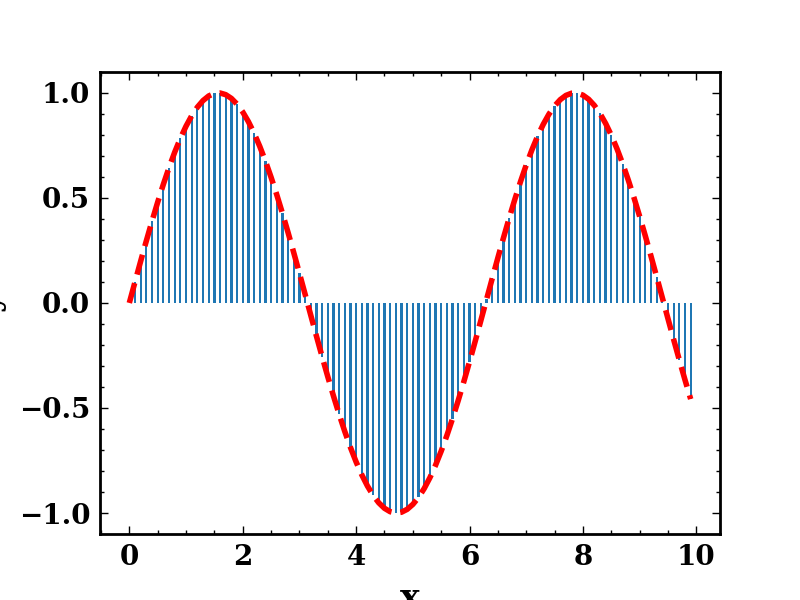

Text(0, 0.5, 'y')

In [116]:
fig, ax = plt.subplots()
x=np.arange(0,10,0.1)
y=np.sin(x)
ax.bar(x,y,width=0.04,linewidth=0.2)
ax.plot(x,y,'r--',linewidth=2)
ax.set_xlabel('x')
ax.set_ylabel('y')

<IPython.core.display.Javascript object>


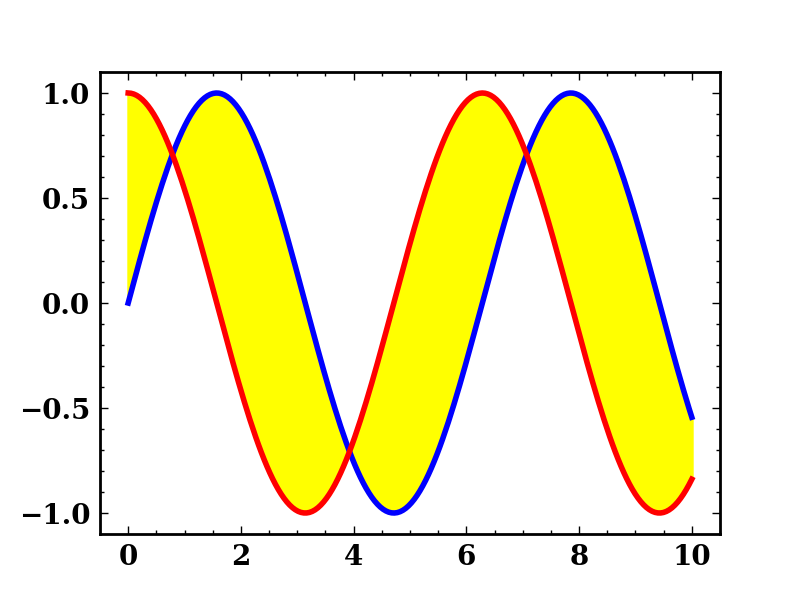

In [18]:
x = np.linspace(0, 10, 200)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots()

ax.fill_between(x, y1, y2, color='yellow')

ax.plot(x, y1, color='blue')
ax.plot(x, y2, color='red')

plt.show()

### `data` keyword argument

<IPython.core.display.Javascript object>


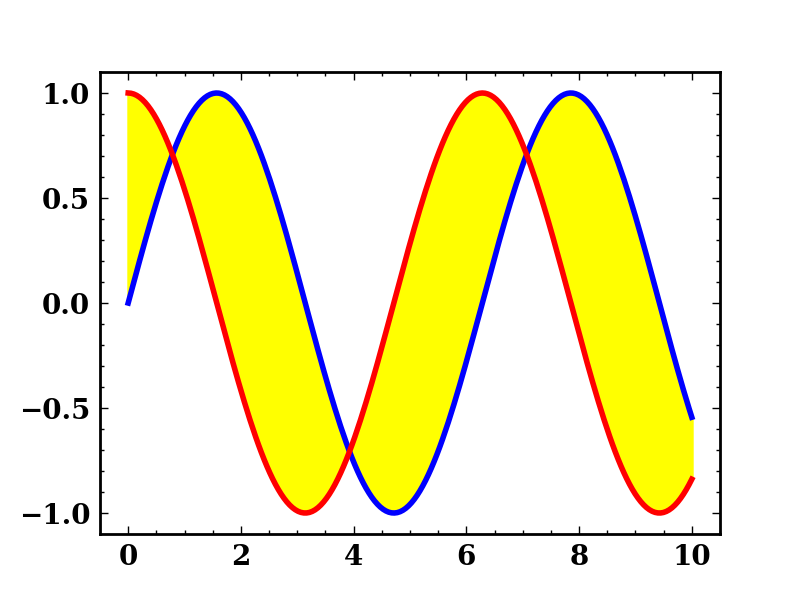

In [19]:
x = np.linspace(0, 10, 200)
data_obj = {"x":x, "sin":np.sin(x), "cos":np.cos(x)}

fig, ax = plt.subplots()
ax.fill_between("x", "sin", "cos", 
                color='yellow', data=data_obj)
ax.plot("x", "sin", color='blue', data=data_obj)
ax.plot("x", "cos", color='red', data=data_obj)


![image.png](attachment:image.png)

In [20]:
np.random.seed(1)

# Generate data...
y_raw = np.random.randn(1000).cumsum() + 15
x_raw = np.linspace(0, 24, y_raw.size)

# Get averages of every 100 samples...
x_pos = x_raw.reshape(-1, 100).min(axis=1)
y_avg = y_raw.reshape(-1, 100).mean(axis=1)
y_err = y_raw.reshape(-1, 100).ptp(axis=1)

bar_width = x_pos[1] - x_pos[0]

# Make a made up future prediction with a fake confidence
x_pred = np.linspace(0, 30)
y_max_pred = y_avg[0] + y_err[0] + 2.3 * x_pred
y_min_pred = y_avg[0] - y_err[0] + 1.2 * x_pred

# Just so you don't have to guess at the colors...
barcolor, linecolor, fillcolor = 'wheat', 'salmon', 'lightblue'

<IPython.core.display.Javascript object>


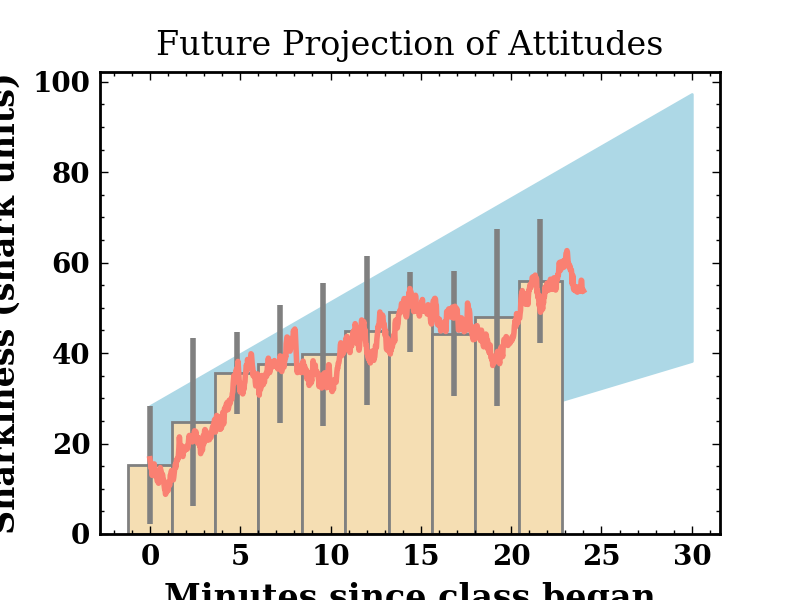

[Text(0, 0.5, 'Snarkiness (snark units)'),
 Text(0.5, 0, 'Minutes since class began'),
 Text(0.5, 1.0, 'Future Projection of Attitudes')]

In [21]:

fig, ax = plt.subplots()

ax.plot(x_raw, y_raw, color=linecolor)
ax.bar(x_pos, y_avg, width=bar_width, color=barcolor, 
       yerr=y_err, ecolor='gray', edgecolor='gray')
ax.fill_between(x_pred, y_min_pred, y_max_pred, 
                color=fillcolor)

ax.set(title='Future Projection of Attitudes', 
       ylabel='Snarkiness (snark units)', 
       xlabel='Minutes since class began')

# plt.savefig("bar_fill.png")



## 绘图属性

### 颜色

### 颜色名字

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

### 十六进制
### RGB

### 标记(Markers)

marker     |  description  | marker    |  description    | marker   |  description  | marker    |  description  
:----------|:--------------|:----------|:----------------|:---------|:--------------|:----------|:--------------
"."        |  point        | "+"       |  plus           | ","      |  pixel        | "x"       |  cross
"o"        |  circle       | "D"       |  diamond        | "d"      |  thin_diamond |           |
"8"        |  octagon      | "s"       |  square         | "p"      |  pentagon     | "\*"      |  star
"&#124;"   |  vertical line| "\_"      | horizontal line |  "h"     |  hexagon1     | "H"       |  hexagon2
0          |  tickleft     | 4         |  caretleft      | "<"      | triangle_left | "3"       |  tri_left
1          |  tickright    | 5         |  caretright     | ">"      | triangle_right| "4"       |  tri_right
2          |  tickup       | 6         |  caretup        | "^"      | triangle_up   | "2"       |  tri_up
3          |  tickdown     | 7         |  caretdown      | "v"      | triangle_down | "1"       |  tri_down
"None"     |  nothing      | `None`    |  default        | " "      |  nothing      | ""        |  nothing

<IPython.core.display.Javascript object>


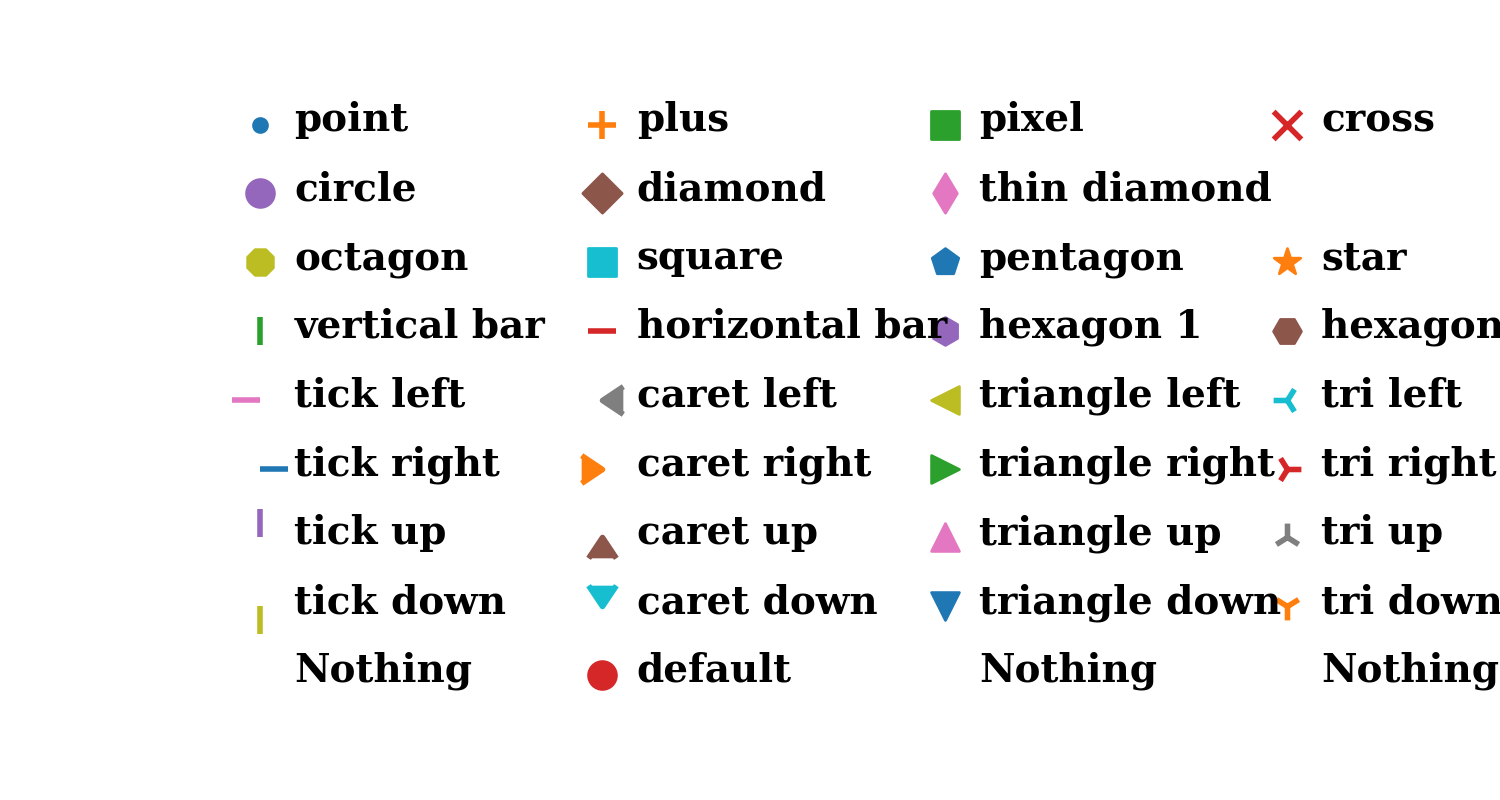

In [22]:
xs, ys = np.mgrid[:4, 9:0:-1]
markers = [".", "+", ",", "x", "o", "D", "d", "", "8", "s", "p", "*", "|", "_", "h", "H", 0, 4, "<", "3",
           1, 5, ">", "4", 2, 6, "^", "2", 3, 7, "v", "1", "None", None, " ", ""]
descripts = ["point", "plus", "pixel", "cross", "circle", "diamond", "thin diamond", "",
             "octagon", "square", "pentagon", "star", "vertical bar", "horizontal bar", "hexagon 1", "hexagon 2",
             "tick left", "caret left", "triangle left", "tri left", "tick right", "caret right", "triangle right", "tri right",
             "tick up", "caret up", "triangle up", "tri up", "tick down", "caret down", "triangle down", "tri down",
             "Nothing", "default", "Nothing", "Nothing"]
fig, ax = plt.subplots(1, 1, figsize=(7.5, 4))
for x, y, m, d in zip(xs.T.flat, ys.T.flat, markers, descripts):
    ax.scatter(x, y, marker=m, s=100)
    ax.text(x + 0.1, y - 0.1, d, size=14)
ax.set_axis_off()

### 线条样式

linestyle          | description
-------------------|------------------------------
'-'                | solid
'--'               | dashed
'-.'               | dashdot
':'                | dotted
'None'             | draw nothing
' '                | draw nothing
''                 | draw nothing

<IPython.core.display.Javascript object>


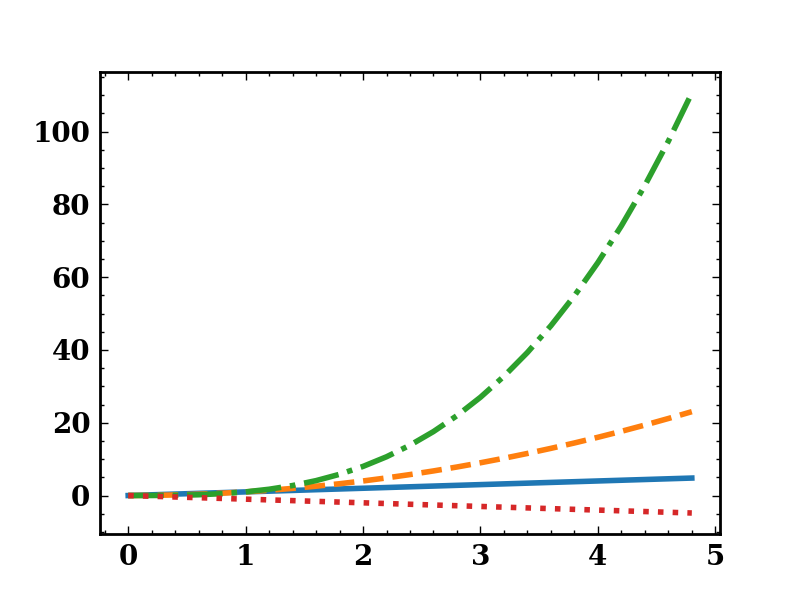

In [23]:
fig, ax = plt.subplots()
t = np.arange(0.0, 5.0, 0.2)
plt.plot(t, t, '-', t, t**2, '--', t, t**3, '-.', 
         t, -t, ':');


<IPython.core.display.Javascript object>


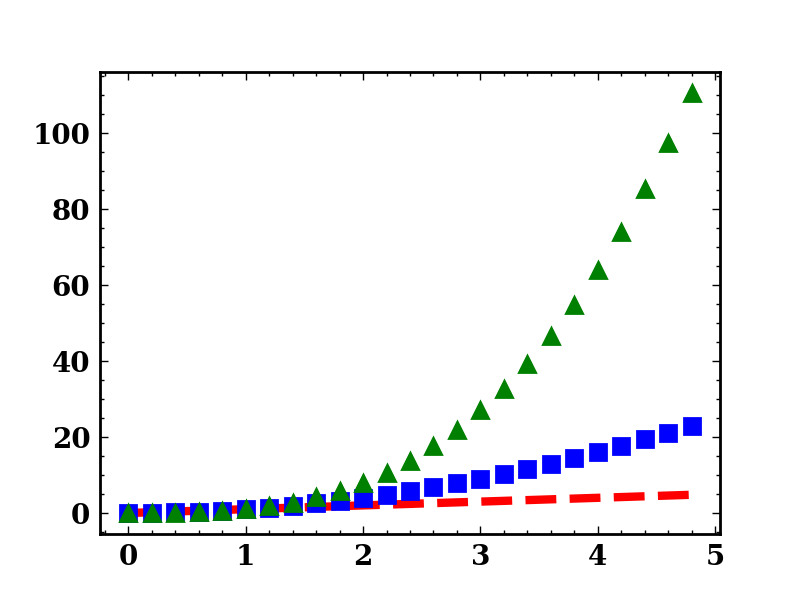

In [32]:
t = np.arange(0., 5., 0.2)

fig, ax = plt.subplots()
plt.plot(t, t, 'r--', t, t**2, 'bs', 
         t, t**3, 'g^');


<IPython.core.display.Javascript object>


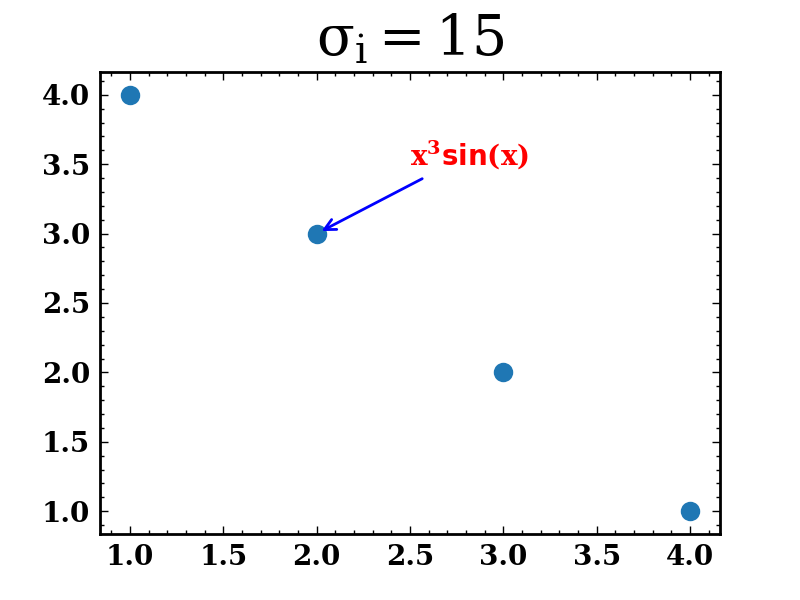

Text(2.5, 3.5, '$x^3\\sin(x)$')

In [24]:
fig, ax = plt.subplots()

ax.scatter([1, 2, 3, 4], [4, 3, 2, 1])
ax.set_title(r'$\sigma_i=15$', fontsize=20)

ax.annotate("$x^3\sin(x)$", (2.0, 3.0), 
        xytext=(2.5, 3.5),
        arrowprops={"arrowstyle":"->", "color":"blue"},
        color="r")



### 使用`matplotlibrc`

In [27]:
print(matplotlib.matplotlib_fname())

/Users/hlyang/.matplotlib/matplotlibrc


In [28]:
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# # mpl.rcdefaults()

# fig, (ax1, ax2) = plt.subplots(1, 2)
# ax1.plot([1, 2, 3, 4])

# mpl.rc('lines', linewidth=3, linestyle='-.')
# # mpl.rcParams['lines.linewidth'] = 2
# # mpl.rcParams['lines.linestyle'] = '-.'
# ax2.plot([1, 2, 3, 4])
# plt.show()

详细可参考: (http://matplotlib.org/users/customizing.html)

## Limits, Legends, and Layouts

![image.png](attachment:image.png)

<IPython.core.display.Javascript object>


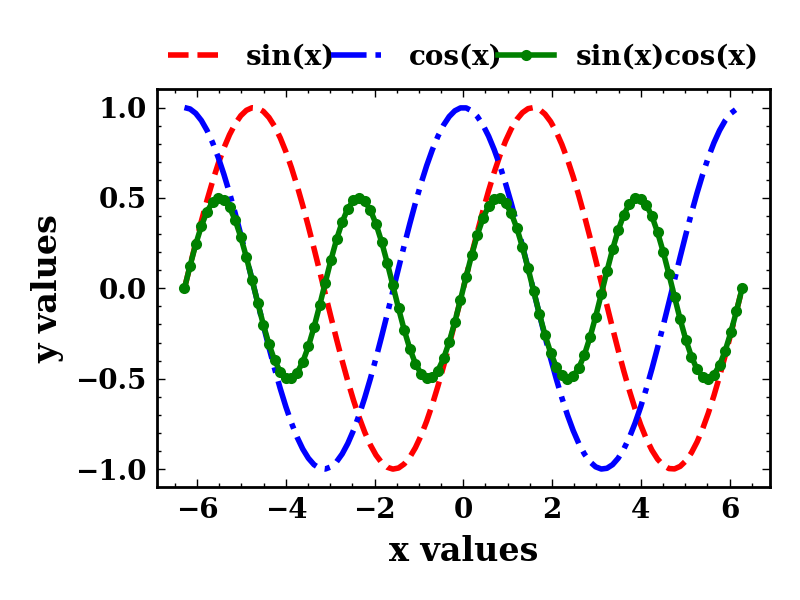

In [31]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x, np.sin(x), "r--", lw=2, label="sin(x)")
ax.plot(x, np.cos(x), color="b", linestyle="-.", 
        linewidth=2, label="cos(x)")
ax.plot(x, np.cos(x)*np.sin(x), "go-", ms=3, label="sin(x)cos(x)")

ax.set_xlabel("x values")
ax.set_ylabel("y values")


# l1 = ax.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
# l2 = ax.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
# l3 = ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
l4 = ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3)
# l5 = ax.legend(bbox_to_anchor=(1,0), loc="lower right", 
#                 bbox_transform=fig.transFigure, ncol=3)
# l6 = ax.legend(bbox_to_anchor=(0.4,0.8), loc="upper right")
plt.tight_layout()


<IPython.core.display.Javascript object>


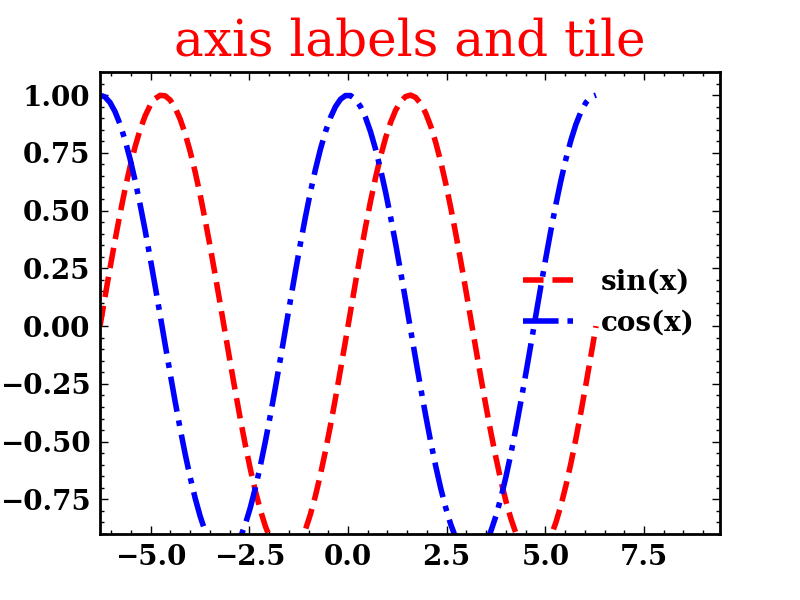

In [61]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), "r--", lw=2, label="sin(x)")
ax.plot(x, np.cos(x), color="b", linestyle="-.", 
        linewidth=2, label="cos(x)")

ax.set_title("axis labels and tile", fontsize=18, 
             fontname="serif", color="red")

ax.set_xlim([-2*np.pi, 2*np.pi*1.5])
ax.set_ylim([-0.9, 1.1])

ax.legend(loc="center right")


<IPython.core.display.Javascript object>


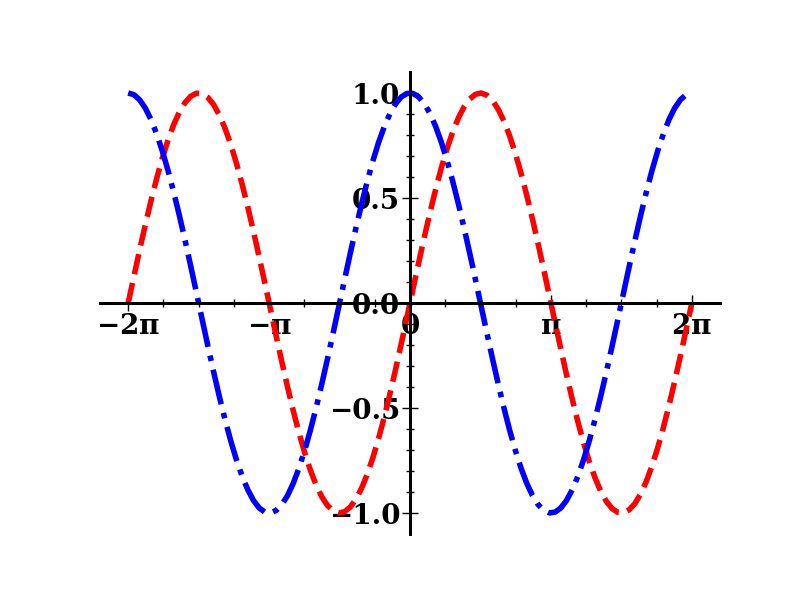

In [34]:
import matplotlib as mpl
x = np.linspace(-2*np.pi, 2*np.pi, 100)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), "r--", lw=2, label="sin(x)")
ax.plot(x, np.cos(x), color="b", linestyle="-.", 
        linewidth=2, label="cos(x)")

# set major tick
ax.set_xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi])
ax.set_xticklabels(['$-2\pi$', '$-\pi$', 0, r'$\pi$', r'$2\pi$'])

# set minor tick
mpl.ticker.FixedLocator([-3 * np.pi / 2, -np.pi/2, 0,
                         np.pi/2, 3 * np.pi/2])

# ax.grid(ls=":")

ax.spines['right'].set_position(("data", 0))
ax.spines['top'].set_position(("data", 0))

ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("data", 0))

# ax.set_xticks([])
# ax.set_yticks([])


<IPython.core.display.Javascript object>


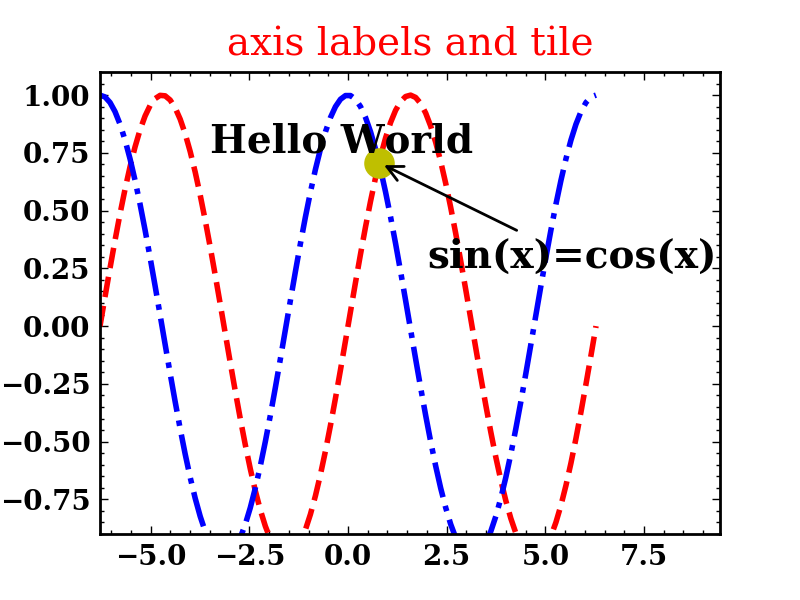

(-0.9, 1.1)

In [75]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), "r--", lw=2, label="sin(x)")
ax.plot(x, np.cos(x), color="b", linestyle="-.", 
        linewidth=2, label="cos(x)")


ax.plot(0.78539816, 0.70710678, "yo", ms=10)

ax.text(-3.5, 0.75, "Hello World", fontsize=14, family="serif")
ax.annotate("sin(x)=cos(x)",
            fontsize=14, family="serif",
            xy=(0.78539816, 0.70710678),
            xytext=(2.0, 0.25),
            arrowprops=dict(arrowstyle="->"))


ax.set_title("axis labels and tile", fontsize=14, 
             fontname="serif", color="red")

ax.set_xlim([-2*np.pi, 2*np.pi*1.5])
ax.set_ylim([-0.9, 1.1])


<IPython.core.display.Javascript object>


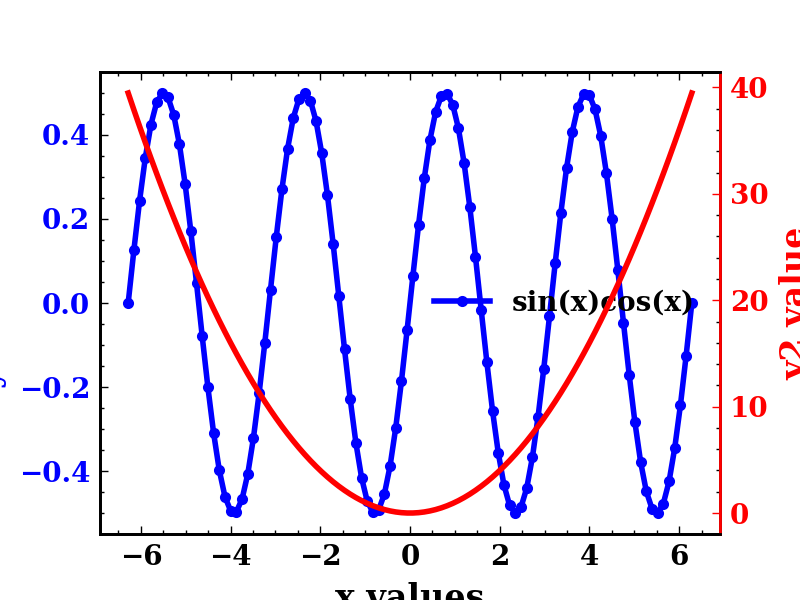

In [33]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
fig, ax = plt.subplots()

ax.plot(x, np.cos(x)*np.sin(x), "bo-", ms=3, label="sin(x)cos(x)")
for label in ax.get_yticklabels():
    label.set_color("blue")
ax.set_xlabel("x values")
ax.set_ylabel("y1 values", color="blue")

ax2 = ax.twinx()
p2, = ax2.plot(x, x**2, "r")
for label in ax2.get_yticklabels():
    label.set_color("red")
ax2.set_ylabel("y2 value", color=p2.get_color())

ax2.spines["right"].set_color(p2.get_color())

ax2.tick_params(axis='y', colors=p2.get_color())
ax.legend()

<IPython.core.display.Javascript object>


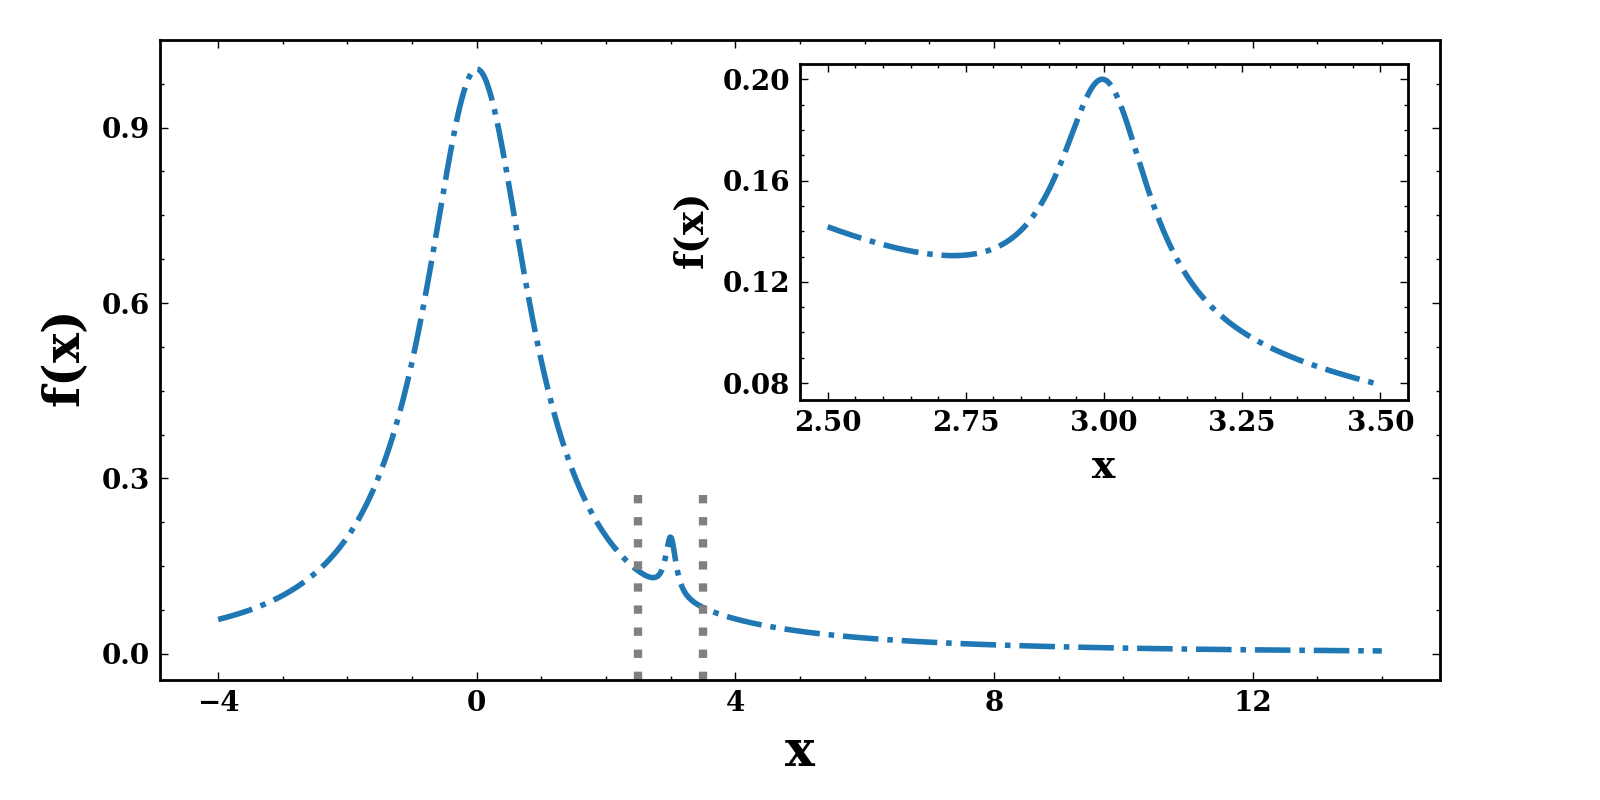

In [77]:
fig = plt.figure(figsize=(8, 4))

def f(x):
    return 1/(1 + x**2) + 0.1/(1 + ((3 - x)/0.1)**2)

def plot_and_format_axes(ax, x, f, fontsize):
    ax.plot(x, f(x), linewidth=2)
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
    ax.set_xlabel(r"$x$", fontsize=fontsize)
    ax.set_ylabel(r"$f(x)$", fontsize=fontsize)
    
# main graph
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8])
x = np.linspace(-4, 14, 1000)
plot_and_format_axes(ax, x, f, 18)

# inset
x0, x1 = 2.5, 3.5
ax.axvline(x0, ymax=0.3, color="grey", linestyle=":")
ax.axvline(x1, ymax=0.3, color="grey", linestyle=":")

ax = fig.add_axes([0.5, 0.5, 0.38, 0.42])
x = np.linspace(x0, x1, 1000)
plot_and_format_axes(ax, x, f, 14)

## 三维绘图

<IPython.core.display.Javascript object>


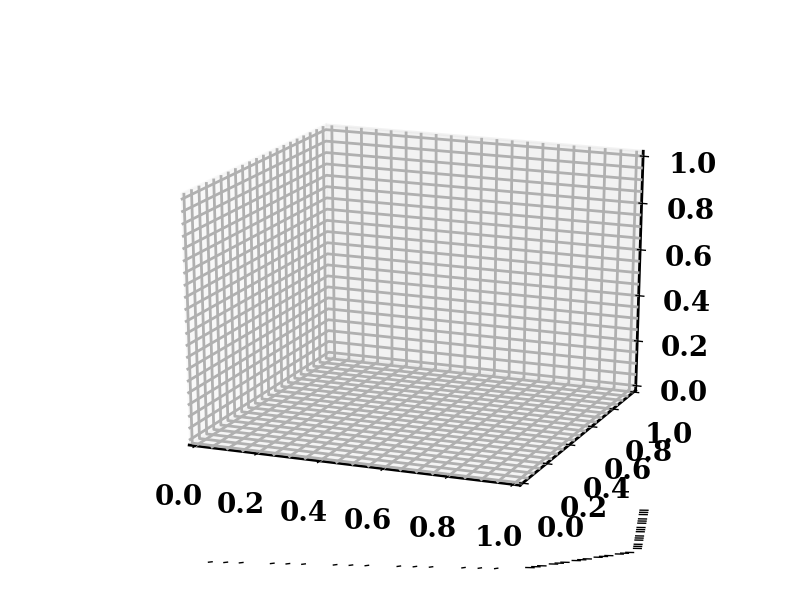

In [36]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

<IPython.core.display.Javascript object>


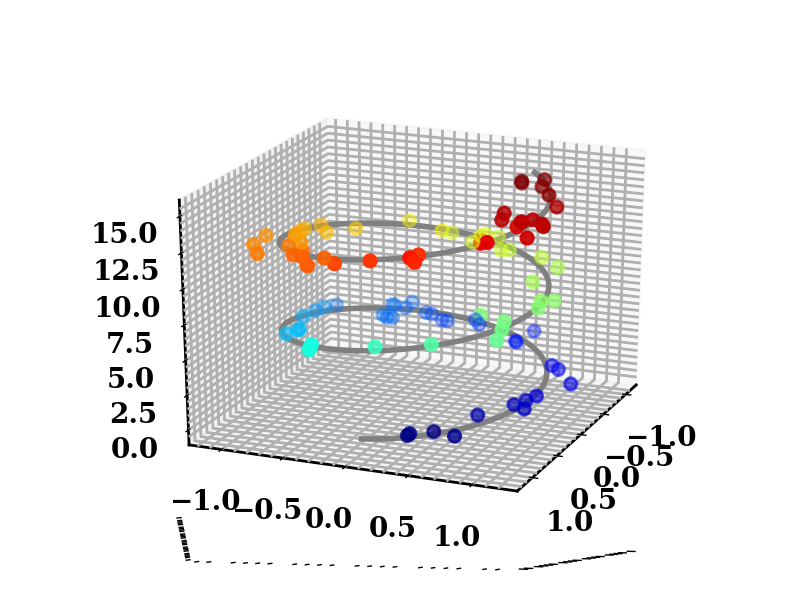

In [38]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = 15 * np.random.random(100)
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='jet');

<IPython.core.display.Javascript object>


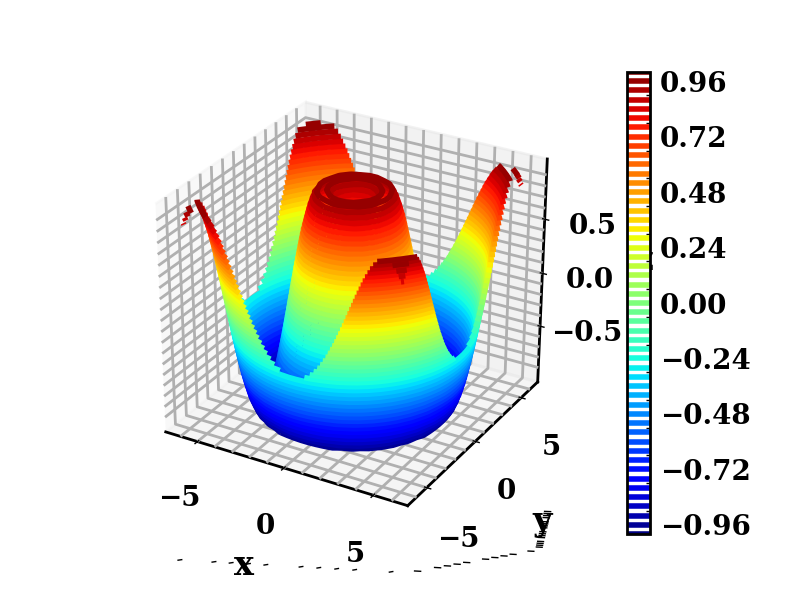

In [67]:
def z_function(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

fig = plt.figure()
ax = plt.axes(projection="3d")
p0 = ax.contour3D(X, Y, Z, 50, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.colorbar(p0)

<IPython.core.display.Javascript object>


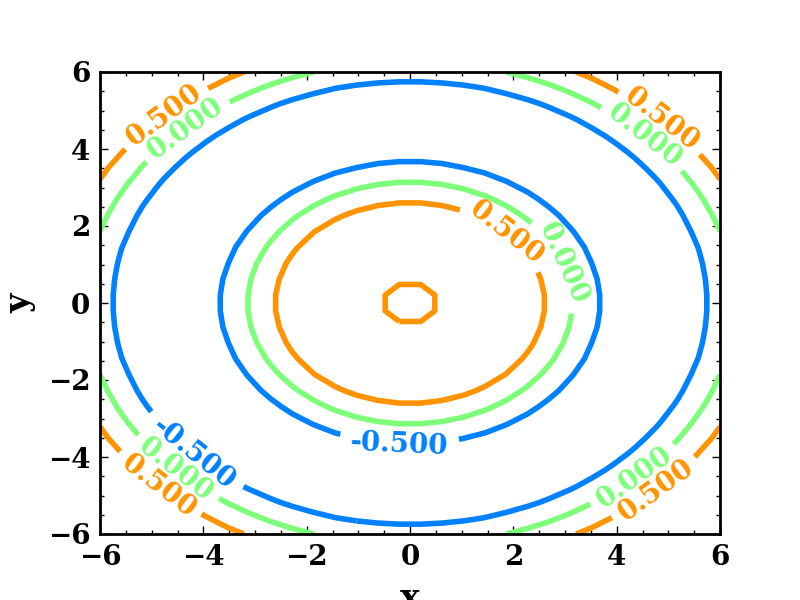

Text(0, 0.5, 'y')

In [66]:
def z_function(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

fig, ax = plt.subplots()
p0 = ax.contour(X, Y, Z, levels=3, cmap='jet')
plt.clabel(p0, inline=True, 
          fontsize=10)
ax.set_xlabel('x')
ax.set_ylabel('y')


<IPython.core.display.Javascript object>


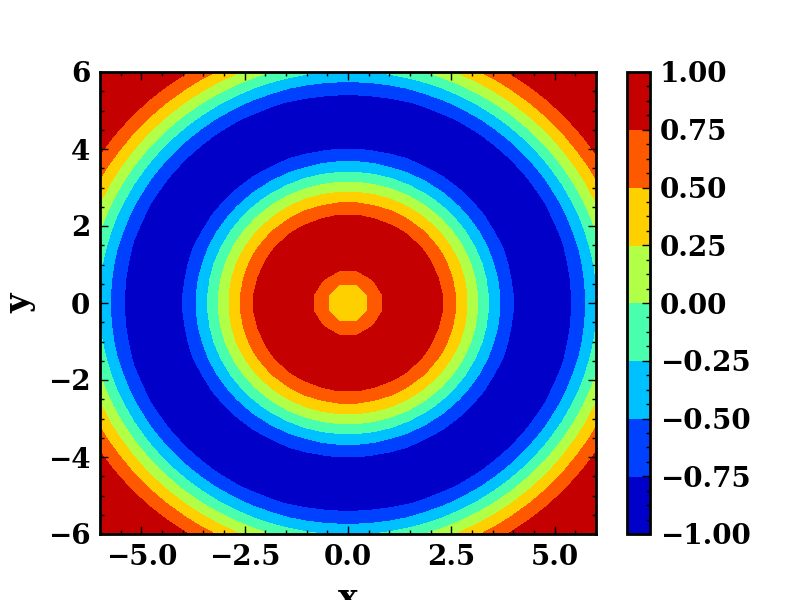

In [75]:
def z_function(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

fig, ax = plt.subplots()
p0 = ax.contourf(X, Y, Z, cmap="jet")
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p0)

<IPython.core.display.Javascript object>


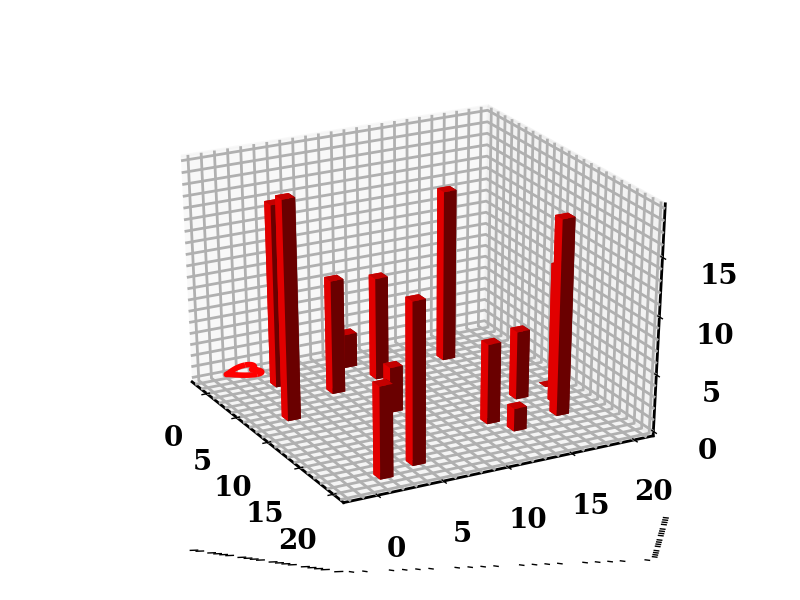

In [82]:
fig = plt.figure()
ax = plt.axes(projection="3d")

num_bars = 15
import random
x_pos = random.sample(range(20), num_bars)
y_pos = random.sample(range(20), num_bars)
z_pos = [0] * num_bars
x_size = np.ones(num_bars)
y_size = np.ones(num_bars)
z_size = random.sample(range(20), num_bars)

ax.bar3d(x_pos, y_pos, z_pos, x_size, y_size, z_size, color='red')
plt.show()

## 动画

<IPython.core.display.Javascript object>


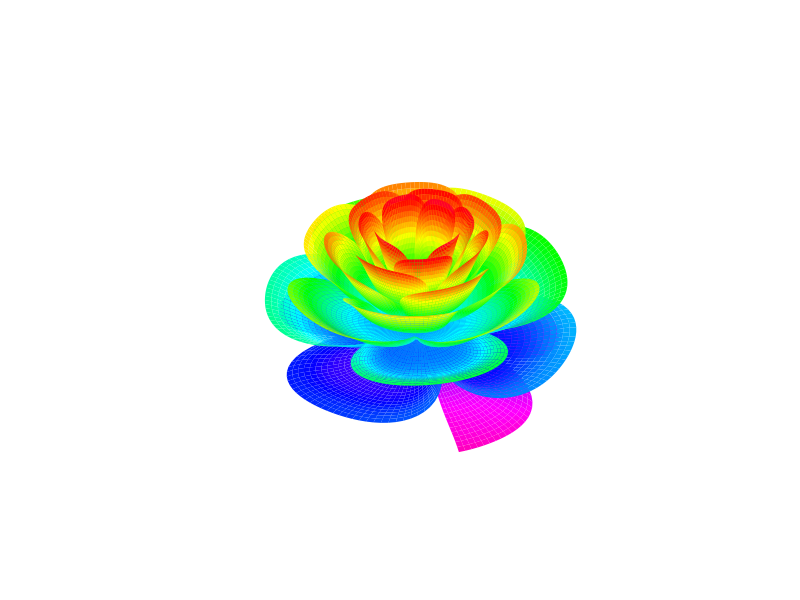

In [125]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.set_axis_off()
[x, t] = np.meshgrid(np.array(range(25))/24.0, 
                     np.arange(0, 575.5, 0.5)/575*17*np.pi-2*np.pi)
p = (np.pi/2)*np.exp(-t/(8*np.pi))
u = 1-(1-np.mod(3.6*t, 2*np.pi)/np.pi)**4/2
y = 2*(x**2-x)**2*np.sin(p)
r = u*(x*np.sin(p)+y*np.cos(p))

surf = ax.plot_surface(r*np.cos(t), r*np.sin(t), 
                       u*(x*np.cos(p)-y*np.sin(p)), 
                       rstride=1, cstride=1, cmap=cm.gist_rainbow_r,
linewidth=0, antialiased=True)
plt.show()

<img src="attachment:image.png" width="600">

<IPython.core.display.Javascript object>


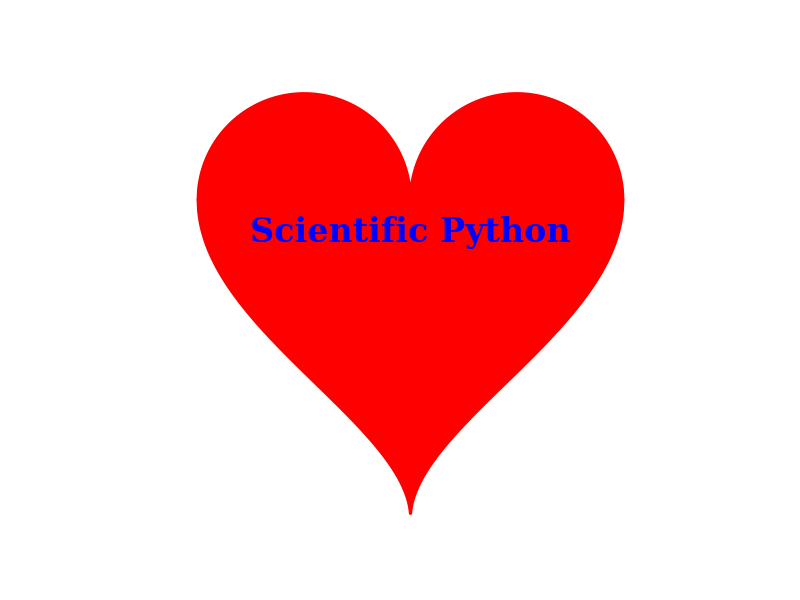

In [126]:
x = np.linspace(-2,2,1000)
y1 = np.sqrt(1-(abs(x)-1)**2)
y2 = -3*np.sqrt(1-(abs(x)/2)**0.5)
fig, ax = plt.subplots()
ax.fill_between(x, y1, color='red')
ax.fill_between(x, y2, color='red')

ax.set_xlim([-2.5, 2.5])
ax.text(0, -0.4, 'Scientific Python', fontsize=12, fontweight='bold',
           color='blue', horizontalalignment='center')
ax.axis('equal')
ax.set_axis_off()
# ax.set_xticks([])
# ax.set_yticks([])

# ax.spines['right'].set_color("white")
# ax.spines['top'].set_color("white")

# ax.spines["bottom"].set_color("white")
# ax.spines["left"].set_color("white")
